In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Data Importing

In [71]:
df = pd.read_csv('./datas/ebola.csv')
df.head(10)

,Indicator,Country,Date,value
0,"Cumulative number of confirmed, probable and s...",Guinea,2015-03-10,3285.0
1,Cumulative number of confirmed Ebola cases,Guinea,2015-03-10,2871.0
2,Cumulative number of probable Ebola cases,Guinea,2015-03-10,392.0
3,Cumulative number of suspected Ebola cases,Guinea,2015-03-10,22.0
4,"Cumulative number of confirmed, probable and s...",Guinea,2015-03-10,2170.0
5,Cumulative number of confirmed Ebola deaths,Guinea,2015-03-10,1778.0
6,Cumulative number of probable Ebola deaths,Guinea,2015-03-10,392.0
7,"Cumulative number of confirmed, probable and s...",Liberia,2015-03-10,9343.0
8,Cumulative number of confirmed Ebola cases,Liberia,2015-03-10,3150.0
9,Cumulative number of probable Ebola cases,Liberia,2015-03-10,1879.0


In [72]:
df.tail(10)

,Indicator,Country,Date,value
17575,Cumulative number of suspected Ebola deaths,Senegal,2016-03-23,0.0
17576,"Cumulative number of confirmed, probable and s...",Senegal,2016-03-23,0.0
17577,Cumulative number of confirmed Ebola deaths,Spain,2016-03-23,0.0
17578,Cumulative number of probable Ebola deaths,Spain,2016-03-23,0.0
17579,Cumulative number of suspected Ebola deaths,Spain,2016-03-23,0.0
17580,"Cumulative number of confirmed, probable and s...",Spain,2016-03-23,0.0
17581,Cumulative number of confirmed Ebola deaths,United States of America,2016-03-23,1.0
17582,Cumulative number of probable Ebola deaths,United States of America,2016-03-23,0.0
17583,Cumulative number of suspected Ebola deaths,United States of America,2016-03-23,0.0
17584,"Cumulative number of confirmed, probable and s...",United States of America,2016-03-23,1.0


In [70]:
len(df)

TypeError: 'int' object is not callable

## Data Preprocessing

### 1. Mengecek apakah ada nilai NA didalam tabel tersebut

In [ ]:
df.isna().sum()

Indicator    0
Country      0
Date         0
value        0
dtype: int64

##### Tidak terdapat Nilai NA pada tabel tersebut

### 2. Mengecek apakah type data dalam tabel tersebut sudah sesuai

In [ ]:
df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%d")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17585 entries, 0 to 17584
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Indicator  17585 non-null  object        
 1   Country    17585 non-null  object        
 2   Date       17585 non-null  datetime64[ns]
 3   value      17585 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 549.7+ KB


#### Type data setiap column sudah sesuai

### 3. Karena Indicator berbeda-beda kita lihat berapa banyak nilai unik dalam kolom tersebut

In [ ]:
df["Indicator"].nunique()

36

##### Terdapat 36 nilai unik pada kolom "Indicator"

### 4. Mengetahui indicator mana yang paling banyak digunakan

In [ ]:
df["Indicator"].value_counts()

Indicator
Cumulative number of confirmed, probable and suspected Ebola deaths                            2485
Cumulative number of confirmed Ebola cases                                                     2484
Cumulative number of confirmed, probable and suspected Ebola cases                             2477
Cumulative number of probable Ebola cases                                                      2436
Cumulative number of suspected Ebola cases                                                     2366
Cumulative number of confirmed Ebola deaths                                                    1648
Cumulative number of probable Ebola deaths                                                     1526
Cumulative number of suspected Ebola deaths                                                    1308
Number of confirmed Ebola cases in the last 21 days                                             190
Number of confirmed, probable and suspected Ebola cases in the last 21 days               

##### Terdapat urutan-urutan Indikator yang paling sering digunakan sesuai tabel diatas

### 5. Membagi data frame berdasarkan kolom Indicator agar mudah dianalisis

In [ ]:
indikator_unik = df["Indicator"].unique()

In [ ]:
df2 = df[df["Indicator"] == indikator_unik[1]]
df6 = df[df["Indicator"] == indikator_unik[5]]

##### Dikarenakan nilai unik pada kolom "Indicator" sangat banyak, disini kami memutuskan untuk menggunakan indikator yang pasti-pasti saja seperti "Cumulative number of confirmed Ebola cases" dan "Cumulative number of confirmed Ebola deaths"

## Preprocessing dan EDA untuk "Cumulative number of confirmed Ebola cases"

### 1. Melihat nilai unik dari kolom "Date" dan mengecek negara mana yang mmemiliki timestamps paling pengkap

In [ ]:
df2["Date"].nunique()

259

In [ ]:
df2["Country"].value_counts()

Country
Guinea                      259
Sierra Leone                259
Liberia                     258
Nigeria                     255
Senegal                     254
United States of America    245
Mali                        243
Spain                       243
United Kingdom              221
Italy                       141
Liberia 2                   105
Guinea 2                      1
Name: count, dtype: int64

##### karena ada 2 yang memiliki timestamp paling lengkap, saya memilih negara Sierra Leone untuk saya eksplorasi

### 2. Filtering negara Sierra Leone dan mengurutkan berdasarkan waktu paling awal

In [ ]:
df2_SierraLeone = df2[df2["Country"] == "Sierra Leone"]
df2_SierraLeone.drop(columns=["Indicator", "Country"], inplace=True)
df2_SierraLeone = df2_SierraLeone.sort_values("Date")
df2_SierraLeone

,Date,value
5086,2014-08-29,482.0
4960,2014-09-05,604.0
4846,2014-09-08,664.0
4746,2014-09-12,678.0
4648,2014-09-16,743.0
...,...,...
17223,2015-12-17,3351.0
17292,2015-12-22,3351.0
17365,2015-12-23,3351.0
17449,2015-12-29,3351.0


### 3. Mencari kejanggalan data dengan menggunakan bantuan fungsi shift

In [ ]:
df2_SierraLeone["shift"] = df2_SierraLeone["value"].shift()
df2_SierraLeone["real"] = df2_SierraLeone["value"] - df2_SierraLeone["shift"]
df2_SierraLeone

,Date,value,shift,real
5086,2014-08-29,482.0,NaN,NaN
4960,2014-09-05,604.0,482.0,122.0
4846,2014-09-08,664.0,604.0,60.0
4746,2014-09-12,678.0,664.0,14.0
4648,2014-09-16,743.0,678.0,65.0
...,...,...,...,...
17223,2015-12-17,3351.0,3351.0,0.0
17292,2015-12-22,3351.0,3351.0,0.0
17365,2015-12-23,3351.0,3351.0,0.0
17449,2015-12-29,3351.0,3351.0,0.0


In [ ]:
df2_SierraLeone[df2_SierraLeone["real"] < 0]

,Date,value,shift,real
7416,2015-05-13,3173.0,3174.0,-1.0
9110,2015-06-17,3245.0,3249.0,-4.0


##### Terdapat 2 data janggal yang terdapat nilai negatif untuk nilai kumulatif

### 4. Fix data janggal dengan menggunakan data sebelumnya

In [ ]:
temp = np.array(df2_SierraLeone["value"])

for i in range(len(temp) - 1):
    if temp[i] >= temp[i+1]:
        temp[i+1] = temp[i]
    else:
        pass

df2_SierraLeone["value"] = temp

In [ ]:
df2_SierraLeone["shift"] = df2_SierraLeone["value"].shift()
df2_SierraLeone["real"] = df2_SierraLeone["value"] - df2_SierraLeone["shift"]
df2_SierraLeone

,Date,value,shift,real
5086,2014-08-29,482.0,NaN,NaN
4960,2014-09-05,604.0,482.0,122.0
4846,2014-09-08,664.0,604.0,60.0
4746,2014-09-12,678.0,664.0,14.0
4648,2014-09-16,743.0,678.0,65.0
...,...,...,...,...
17223,2015-12-17,3351.0,3351.0,0.0
17292,2015-12-22,3351.0,3351.0,0.0
17365,2015-12-23,3351.0,3351.0,0.0
17449,2015-12-29,3351.0,3351.0,0.0


In [ ]:
df2_SierraLeone[df2_SierraLeone["real"] < 0]

,Date,value,shift,real


##### Sudah tidak ada data janggal dalam dataset tersebut

### 5. Mencari selisih tanggal paling awal dan akhir untuk mengetahui missing value

In [ ]:
start = df2_SierraLeone["Date"].min()
end = df2_SierraLeone["Date"].max()

print(start)
print(end)

2014-08-29 00:00:00
2016-03-23 00:00:00


In [ ]:
df2_SierraLeone["Date"].duplicated().sum()

0

##### Tidak ada "Date" yang duplikat

In [ ]:
timestamps = np.arange(start, end + np.timedelta64(1, 'D'), dtype='datetime64[D]')
timestamps

array(['2014-08-29', '2014-08-30', '2014-08-31', '2014-09-01',
       '2014-09-02', '2014-09-03', '2014-09-04', '2014-09-05',
       '2014-09-06', '2014-09-07', '2014-09-08', '2014-09-09',
       '2014-09-10', '2014-09-11', '2014-09-12', '2014-09-13',
       '2014-09-14', '2014-09-15', '2014-09-16', '2014-09-17',
       '2014-09-18', '2014-09-19', '2014-09-20', '2014-09-21',
       '2014-09-22', '2014-09-23', '2014-09-24', '2014-09-25',
       '2014-09-26', '2014-09-27', '2014-09-28', '2014-09-29',
       '2014-09-30', '2014-10-01', '2014-10-02', '2014-10-03',
       '2014-10-04', '2014-10-05', '2014-10-06', '2014-10-07',
       '2014-10-08', '2014-10-09', '2014-10-10', '2014-10-11',
       '2014-10-12', '2014-10-13', '2014-10-14', '2014-10-15',
       '2014-10-16', '2014-10-17', '2014-10-18', '2014-10-19',
       '2014-10-20', '2014-10-21', '2014-10-22', '2014-10-23',
       '2014-10-24', '2014-10-25', '2014-10-26', '2014-10-27',
       '2014-10-28', '2014-10-29', '2014-10-30', '2014-

In [ ]:
print(len(df2_SierraLeone))
print(len(timestamps))

259
573


##### Terdapat 314 Missing value pada data ini

### 6. Melakukan Left join antara timestamp lengkap dan timestamp data untuk melihat grafik pada data tersebut

In [ ]:
df_waktu = pd.DataFrame({
    "Date" : timestamps
})

df2_SierraLeone = pd.merge(df_waktu, df2_SierraLeone, on="Date", how="left")

##### Plot sebelum data diimputasi

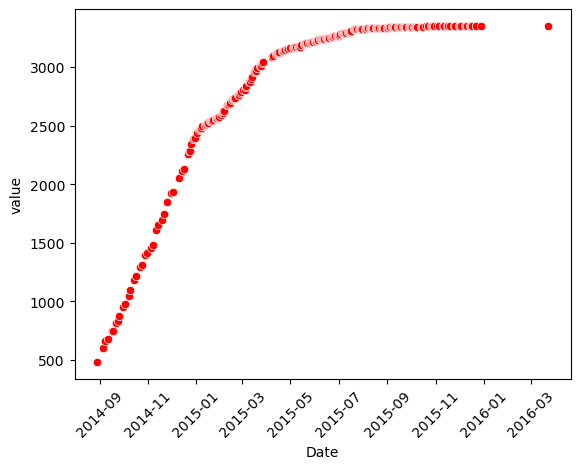

In [ ]:
df2_SierraLeone.set_index("Date", inplace=True)
sns.scatterplot(df2_SierraLeone["value"], color="red")
plt.xticks(rotation=45)
plt.show()

##### Plot setelah data diimputasi dengan interpolasi linear

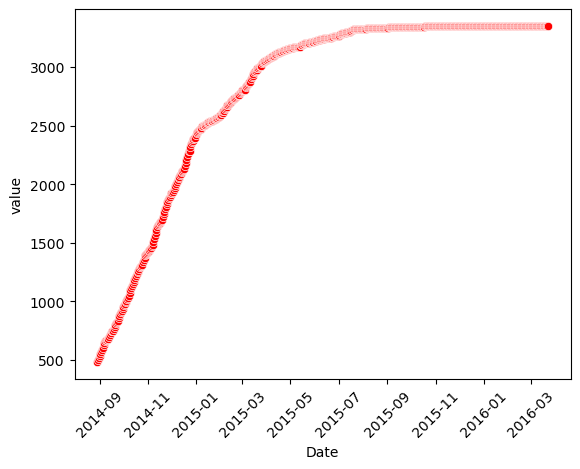

In [ ]:
df2_SierraLeone.interpolate(method="linear", inplace=True)
df2_SierraLeone["value"] = df2_SierraLeone["value"].round(0)
sns.scatterplot(df2_SierraLeone["value"], color="red")
plt.xticks(rotation=45)
plt.show()

### 7. Menggunakan plot residu dari fungsi shift untuk melihat fluktuasi kasus ebola

In [ ]:
df2_SierraLeone["shift"] = df2_SierraLeone["value"].shift()
df2_SierraLeone["real"] = df2_SierraLeone["value"] - df2_SierraLeone["shift"]
df2_SierraLeone

,value,shift,real
Date,,,
2014-08-29,482.0,NaN,NaN
2014-08-30,499.0,482.0,17.0
2014-08-31,517.0,499.0,18.0
2014-09-01,534.0,517.0,17.0
2014-09-02,552.0,534.0,18.0
...,...,...,...
2016-03-19,3351.0,3351.0,0.0
2016-03-20,3351.0,3351.0,0.0
2016-03-21,3351.0,3351.0,0.0


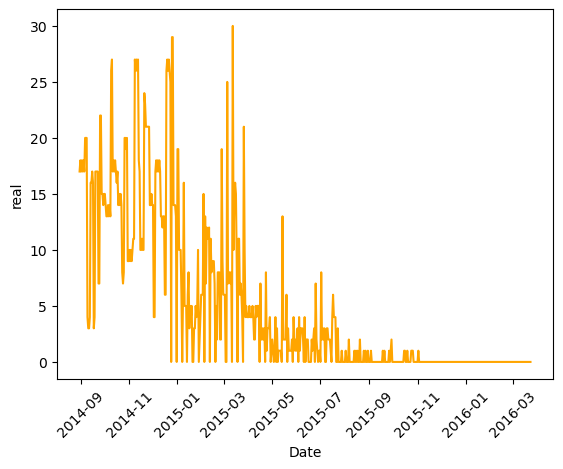

In [ ]:
sns.lineplot(df2_SierraLeone["real"], color="orange")
plt.xticks(rotation=45)
plt.show()

##### Dapat dilihat kasus ebola sangat fluktuatif pada akhir 2014 dan awal 2015 dan melandai di akhir 2015

### 8. Memunculkan hari dengan kasus ebola terbanyak

In [ ]:
sorted_df2 = df2_SierraLeone["real"].sort_values(ascending=False)
top_7 = sorted_df2.head(7)
top_7 = pd.DataFrame(top_7).reset_index()
top_7['Date'] = pd.to_datetime(top_7["Date"], format = "%Y-%m-%d")
top_7

,Date,real
0,2015-03-12,30.0
1,2014-12-26,29.0
2,2014-12-25,29.0
3,2014-12-21,27.0
4,2014-11-12,27.0
5,2014-12-19,27.0
6,2014-11-08,27.0


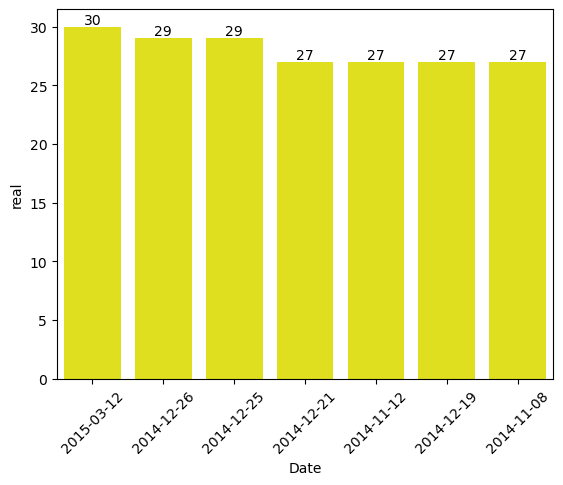

In [ ]:
sns.barplot(x=top_7['Date'], y=top_7['real'], color="yellow")
plt.xticks(rotation=45)
for index, value in enumerate(top_7['real']):
    plt.text(index, value, f'{value:.0f}', ha='center', va='bottom')
plt.show()

## Preprocessing dan EDA untuk "Cumulative number of confirmed Ebola deaths"

### 1. Melihat nilai unik dari kolom "Date" dan mengecek negara mana yang mmemiliki timestamps paling pengkap

In [ ]:
df6["Date"].nunique()

259

In [ ]:
df6["Country"].value_counts()

Country
Guinea                      257
Sierra Leone                257
Nigeria                     255
Senegal                     254
United States of America    245
Spain                       243
Liberia 2                   105
Liberia                      19
Mali                          9
United Kingdom                2
Italy                         1
Guinea 2                      1
Name: count, dtype: int64

##### Disini tidak ada negara yang benar2 memiliki timestamp unik yang ada pada data tersebut, kami memutuskan berfokus pada Sierra Leone

### 2. Filtering negara Sierra Leone dan mengurutkan berdasarkan waktu paling awal


In [ ]:
df6_SierraLeone = df6[df6["Country"] == "Sierra Leone"]
df6_SierraLeone.drop(columns=["Indicator", "Country"], inplace=True)
df6_SierraLeone = df6_SierraLeone.sort_values("Date")
df6_SierraLeone

,Date,value
5134,2014-08-29,287.0
5014,2014-09-05,362.0
4905,2014-09-08,400.0
4806,2014-09-12,403.0
4706,2014-09-16,429.0
...,...,...
17219,2015-12-17,2083.0
17299,2015-12-22,2083.0
17374,2015-12-23,2083.0
17441,2015-12-29,2083.0


### 3. Mencari kejanggalan data dengan menggunakan bantuan fungsi shift

In [ ]:
df6_SierraLeone["shift"] = df6_SierraLeone["value"].shift()
df6_SierraLeone["real"] = df6_SierraLeone["value"] - df6_SierraLeone["shift"]
df6_SierraLeone

,Date,value,shift,real
5134,2014-08-29,287.0,NaN,NaN
5014,2014-09-05,362.0,287.0,75.0
4905,2014-09-08,400.0,362.0,38.0
4806,2014-09-12,403.0,400.0,3.0
4706,2014-09-16,429.0,403.0,26.0
...,...,...,...,...
17219,2015-12-17,2083.0,2083.0,0.0
17299,2015-12-22,2083.0,2083.0,0.0
17374,2015-12-23,2083.0,2083.0,0.0
17441,2015-12-29,2083.0,2083.0,0.0


In [ ]:
df6_SierraLeone[df6_SierraLeone["real"] < 0]

,Date,value,shift,real
7423,2015-05-13,1976.0,1977.0,-1.0


##### Terdapat 1 data janggal yang terdapat nilai negatif untuk nilai kumulatif

### 4. Fix data janggal dengan menggunakan data sebelumnya

In [ ]:
temp2 = np.array(df6_SierraLeone["value"])

for i in range(len(temp2) - 1):
    if temp2[i] >= temp2[i+1]:
        temp2[i+1] = temp2[i]
    else:
        pass

df6_SierraLeone["value"] = temp2

In [ ]:
df6_SierraLeone["shift"] = df6_SierraLeone["value"].shift()
df6_SierraLeone["real"] = df6_SierraLeone["value"] - df6_SierraLeone["shift"]
df6_SierraLeone[df6_SierraLeone["real"] < 0]

,Date,value,shift,real


### 5. Mencari selisih tanggal paling awal dan akhir untuk mengetahui missing value

In [ ]:
start = df6_SierraLeone["Date"].min()
end = df6_SierraLeone["Date"].max()

print(start)
print(end)

2014-08-29 00:00:00
2016-03-23 00:00:00


In [ ]:
df6_SierraLeone["Date"].duplicated().sum()

0

##### Tidak ada "Date" yang duplikat

In [ ]:
df6_SierraLeone.head()

,Date,value,shift,real
5134,2014-08-29,287.0,NaN,NaN
5014,2014-09-05,362.0,287.0,75.0
4905,2014-09-08,400.0,362.0,38.0
4806,2014-09-12,403.0,400.0,3.0
4706,2014-09-16,429.0,403.0,26.0


In [ ]:
timestamps = np.arange(start, end + np.timedelta64(1, 'D'), dtype='datetime64[D]')
timestamps

array(['2014-08-29', '2014-08-30', '2014-08-31', '2014-09-01',
       '2014-09-02', '2014-09-03', '2014-09-04', '2014-09-05',
       '2014-09-06', '2014-09-07', '2014-09-08', '2014-09-09',
       '2014-09-10', '2014-09-11', '2014-09-12', '2014-09-13',
       '2014-09-14', '2014-09-15', '2014-09-16', '2014-09-17',
       '2014-09-18', '2014-09-19', '2014-09-20', '2014-09-21',
       '2014-09-22', '2014-09-23', '2014-09-24', '2014-09-25',
       '2014-09-26', '2014-09-27', '2014-09-28', '2014-09-29',
       '2014-09-30', '2014-10-01', '2014-10-02', '2014-10-03',
       '2014-10-04', '2014-10-05', '2014-10-06', '2014-10-07',
       '2014-10-08', '2014-10-09', '2014-10-10', '2014-10-11',
       '2014-10-12', '2014-10-13', '2014-10-14', '2014-10-15',
       '2014-10-16', '2014-10-17', '2014-10-18', '2014-10-19',
       '2014-10-20', '2014-10-21', '2014-10-22', '2014-10-23',
       '2014-10-24', '2014-10-25', '2014-10-26', '2014-10-27',
       '2014-10-28', '2014-10-29', '2014-10-30', '2014-

In [ ]:
print(len(df6_SierraLeone))
print(len(timestamps))

257
573


##### Terdapat 316 Missing value pada data ini

### 6. Melakukan Left join antara timestamp lengkap dan timestamp data untuk melihat grafik pada data tersebut


In [ ]:
df_waktu = pd.DataFrame({
    "Date" : timestamps
})

df6_SierraLeone = pd.merge(df_waktu, df6_SierraLeone, on="Date", how="left")

##### Plot sebelum data diimputasi


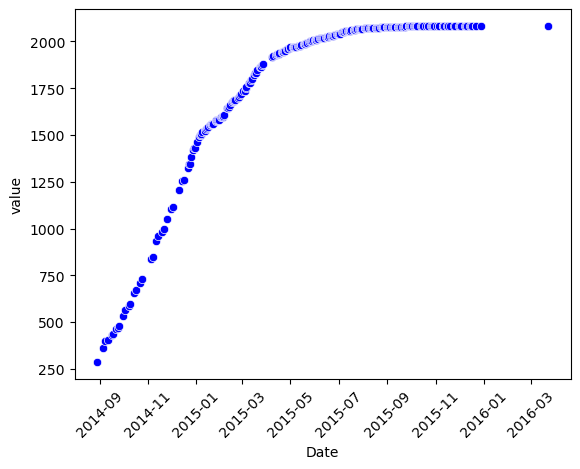

In [ ]:
df6_SierraLeone.set_index("Date", inplace=True)
sns.scatterplot(df6_SierraLeone["value"], color="blue")
plt.xticks(rotation=45)
plt.show()

##### Plot setelah data diimputasi dengan interpolasi linear

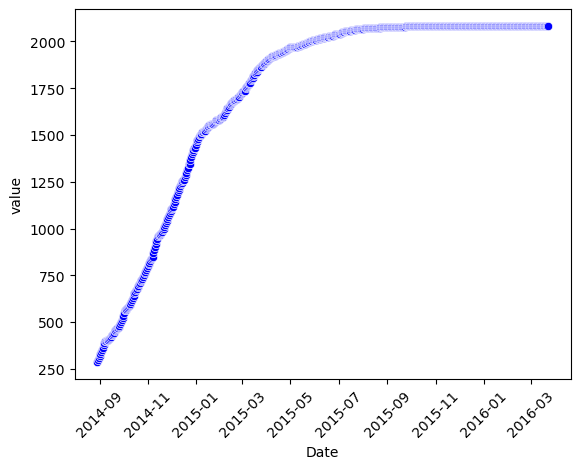

In [ ]:
df6_SierraLeone.interpolate(method="linear", inplace=True)
df6_SierraLeone["value"] = df6_SierraLeone["value"].round(0)
sns.scatterplot(df6_SierraLeone["value"], color="blue")
plt.xticks(rotation=45)
plt.show()

### 7. Menggunakan plot residu dari fungsi shift untuk melihat fluktuasi kasus ebola


In [ ]:
df6_SierraLeone["shift"] = df6_SierraLeone["value"].shift()
df6_SierraLeone["real"] = df6_SierraLeone["value"] - df6_SierraLeone["shift"]
df6_SierraLeone

,value,shift,real
Date,,,
2014-08-29,287.0,NaN,NaN
2014-08-30,298.0,287.0,11.0
2014-08-31,308.0,298.0,10.0
2014-09-01,319.0,308.0,11.0
2014-09-02,330.0,319.0,11.0
...,...,...,...
2016-03-19,2083.0,2083.0,0.0
2016-03-20,2083.0,2083.0,0.0
2016-03-21,2083.0,2083.0,0.0


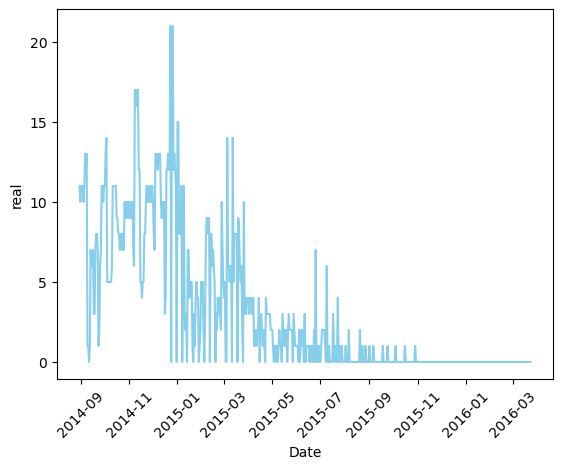

In [ ]:
sns.lineplot(df6_SierraLeone["real"], color="skyblue")
plt.xticks(rotation=45)
plt.show()

##### Dapat dilihat kasus kematian akibat ebola sangat fluktuatif pada akhir 2014 dan awal 2015 dan melandai di akhir 2015

In [ ]:
sorted_df6 = df6_SierraLeone["real"].sort_values(ascending=False)
top_7 = sorted_df6.head(7)
top_7 = pd.DataFrame(top_7).reset_index()
top_7['Date'] = pd.to_datetime(top_7["Date"], format = "%Y-%m-%d")
top_7

,Date,real
0,2014-12-23,21.0
1,2014-12-26,21.0
2,2014-12-25,20.0
3,2014-11-12,17.0
4,2014-11-11,17.0
5,2014-11-08,17.0
6,2014-11-09,17.0


### 8. Memunculkan hari dengan kasus kematian terbanyak akibat ebola

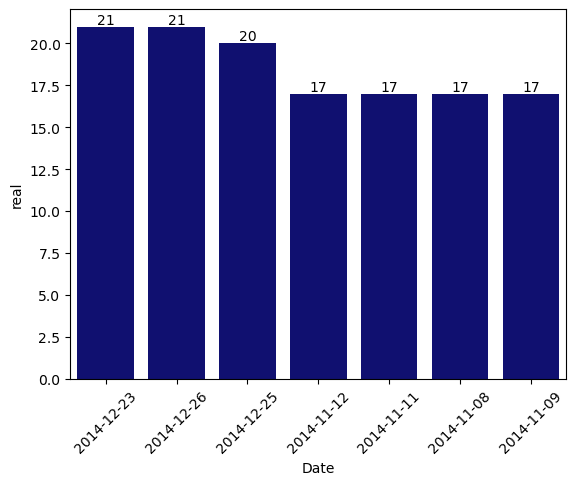

In [ ]:
sns.barplot(x=top_7['Date'], y=top_7['real'], color="navy")
plt.xticks(rotation=45)
for index, value in enumerate(top_7['real']):
    plt.text(index, value, f'{value:.0f}', ha='center', va='bottom')
plt.show()